In [1]:
# since we work in a couple, we should check python version in advance and set it to 3.6.5
from platform import python_version
print(python_version())

3.6.5


# Load input files

#### Load images

In [1]:
import os
from glob import glob

# After extracting all images to a folder named 'images'
path = os.path.abspath(os.path.join('..', 'project - NIH random sampled'))
source_images = os.path.join(path, "images")
images = glob(os.path.join(source_images, "*.png"))

images[0:5]

['C:\\Users\\Yair\\Data science - Technion\\project - NIH random sampled\\images\\00000013_005.png',
 'C:\\Users\\Yair\\Data science - Technion\\project - NIH random sampled\\images\\00000013_026.png',
 'C:\\Users\\Yair\\Data science - Technion\\project - NIH random sampled\\images\\00000017_001.png',
 'C:\\Users\\Yair\\Data science - Technion\\project - NIH random sampled\\images\\00000030_001.png',
 'C:\\Users\\Yair\\Data science - Technion\\project - NIH random sampled\\images\\00000032_001.png']

In [ ]:
### ~~~ An attempt to open from zip file directly, without extracting all files ~~~~ ###

#from zipfile import ZipFile

#archive = ZipFile('sample.zip', 'r')
#images = archive.namelist()

#images[0:10]

In [17]:
# Use to check the running time of a procedure
import time

start_time = time.time()

print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0 seconds ---


#### Load csv file

In [14]:
import pandas as pd

all_xray_df = pd.read_csv('Data_Entry_2017.csv')

all_xray_df.sample(5)


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
81762,00020113_018.png,Atelectasis|Effusion,18,20113,38,M,AP,3056,2544,0.139,0.139,NaN
36359,00009600_013.png,Atelectasis|Infiltration,13,9600,65,F,AP,2500,2048,0.168,0.168,NaN
77989,00019150_007.png,Infiltration,7,19150,69,M,AP,3056,2544,0.139,0.139,NaN
95643,00025150_006.png,Consolidation|Infiltration|Mass|Nodule,6,25150,49,M,PA,2992,2991,0.143,0.143,NaN
49261,00012492_007.png,No Finding,7,12492,38,F,AP,2500,2048,0.168,0.168,NaN


#### Represent 3 random images to validate the loading process

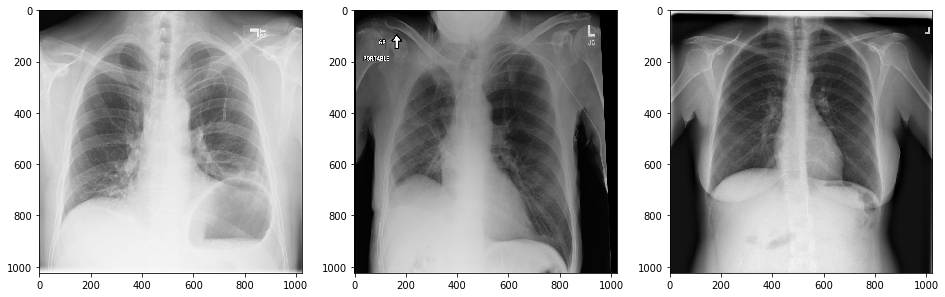

In [12]:
import cv2
import random
import matplotlib.pylab as plt

r = random.sample(images, 3)

plt.figure(figsize=(16,16))
plt.subplot(131)
plt.imshow(cv2.imread(r[0]))

plt.subplot(132)
plt.imshow(cv2.imread(r[1]))

plt.subplot(133)
plt.imshow(cv2.imread(r[2]))
plt.show()


# Preprocessing - organize the data

In [4]:
# For sampled data CSV only - Patient age of 48 looks like '048Y'. We want an integer

all_xray_df['Patient Age'] = all_xray_df['Patient Age'].map(lambda x: int(x[:-1]))

Code explanation:

DataFrame.apply operates on entire rows or columns at a time.

DataFrame.map operate on one element at time.

In [15]:
# Keep relevant columns only

all_xray_df = all_xray_df[['Image Index','Finding Labels','Follow-up #',
                           'Patient ID','Patient Age','Patient Gender','View Position']]

In [16]:
all_xray_df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA
3,00000002_000.png,No Finding,0,2,81,M,PA
4,00000003_000.png,Hernia,0,3,81,F,PA


#### Describe all parameters to understand data and search for missing values

In [17]:
all_xray_df.describe(include='all')

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position
count,112120,112120,112120.000000,112120.000000,112120.000000,112120,112120
unique,112120,836,NaN,NaN,NaN,2,2
top,00005089_016.png,No Finding,NaN,NaN,NaN,M,PA
freq,1,60361,NaN,NaN,NaN,63340,67310
mean,NaN,NaN,8.573751,14346.381743,46.901463,NaN,NaN
std,NaN,NaN,15.406320,8403.876972,16.839923,NaN,NaN
min,NaN,NaN,0.000000,1.000000,1.000000,NaN,NaN
25%,NaN,NaN,0.000000,7310.750000,35.000000,NaN,NaN
50%,NaN,NaN,3.000000,13993.000000,49.000000,NaN,NaN
75%,NaN,NaN,10.000000,20673.000000,59.000000,NaN,NaN


As represented in the table above, there are no missing values for all variables (both categorical and numerical).

The database includes 112,120 x-ray images of 30,805 unique patients.

It can be observed that 60,361 out of 112,120 images represent healthy subjects ('No Finding'). 
Moreover, 56% of the subjects are males and 60% of the images' view position is posterioranterior (PA, when patient's back faces the machine).

It can also be observed that there are outliers of patient age, since 414 years is the maximal value, and that the follow up median # is 3, while the mean is 8.5, meaning the distribution is not normal.

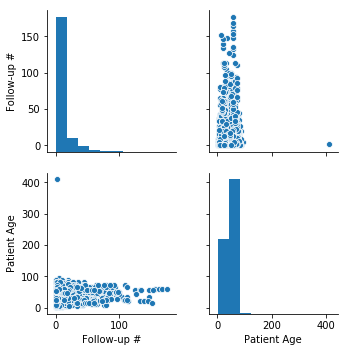

In [46]:
# remove
import seaborn as sns
sns.pairplot(all_xray_df[['Follow-up #','Patient Age']])
plt.show()


In [41]:
# remove
all_xray_df.dtypes

Image Index           object
Finding Labels        object
Follow-up #            int64
Patient ID             int64
Patient Age            int64
Patient Gender        object
View Position         object
Atelectasis            int64
Consolidation          int64
Infiltration           int64
Pneumothorax           int64
Edema                  int64
Emphysema              int64
Fibrosis               int64
Effusion               int64
Pneumonia              int64
Pleural_thickening     int64
Cardiomegaly           int64
Nodule                 int64
Mass                   int64
Hernia                 int64
No Finding             int64
dtype: object

# Explanatory Data Analysis (EDA)

### Understand the data in matters of the amount of each disease

In [18]:
# Create a column 0f 0/1 for each desease

list_pathology = ['Atelectasis','Consolidation','Infiltration','Pneumothorax','Edema',
                  'Emphysema','Fibrosis','Effusion','Pneumonia','Pleural_thickening',
                  'Cardiomegaly','Nodule','Mass','Hernia','No Finding']

for pathology in list_pathology :
    all_xray_df[pathology] = all_xray_df['Finding Labels'].apply(lambda x: 1 if pathology in x else 0)

In [19]:
data=all_xray_df.groupby('Finding Labels').count().sort_values('Image Index',ascending=False)
data.head()

,Image Index,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,Atelectasis,Consolidation,Infiltration,Pneumothorax,...,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_thickening,Cardiomegaly,Nodule,Mass,Hernia,No Finding
Finding Labels,,,,,,,,,,,,,,,,,,,,,
No Finding,60361,60361,60361,60361,60361,60361,60361,60361,60361,60361,...,60361,60361,60361,60361,60361,60361,60361,60361,60361,60361
Infiltration,9547,9547,9547,9547,9547,9547,9547,9547,9547,9547,...,9547,9547,9547,9547,9547,9547,9547,9547,9547,9547
Atelectasis,4215,4215,4215,4215,4215,4215,4215,4215,4215,4215,...,4215,4215,4215,4215,4215,4215,4215,4215,4215,4215
Effusion,3955,3955,3955,3955,3955,3955,3955,3955,3955,3955,...,3955,3955,3955,3955,3955,3955,3955,3955,3955,3955
Nodule,2705,2705,2705,2705,2705,2705,2705,2705,2705,2705,...,2705,2705,2705,2705,2705,2705,2705,2705,2705,2705


In [ ]:
#data=all_xray_df.groupby('Finding Labels').count().sort_values('Patient ID',ascending=False)
df1=data[['|' in index for index in data.index]].copy()
df2=data[['|' not in index for index in data.index]].copy()

" In ChestX-ray8, X-rays images are directly extracted from the DICOM file and resized as 1024×1024 bitmap images without significantly losing the detail contents, compared with image sizes of 512 × 512 in OpenI dataset. " [1]

[1] Xiaosong Wang et al., ChestX-ray8: Hospital-scale Chest X-ray Database and Benchmarks on Weakly-Supervised Classification and Localization of Common Thorax Diseases

"Before inputting the images into the network, we downscale the images to 224×224 and normalize based on the mean and standard deviation of images in the ImageNet training set. We also augment the training data with random horizontal flipping."

[2] CheXNet: Radiologist-Level Pneumonia Detection on Chest X-Rays with Deep Learning
